In [118]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
from scipy.stats import chi2_contingency 
#Model Building Libraries 
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

import joblib

In [26]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: title={'center': 'Telcom Customer'}>

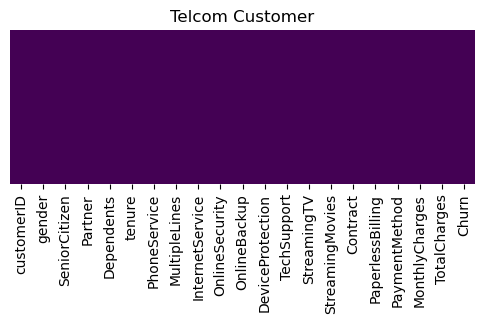

In [43]:
# Investigating if they are missing values
plt.figure(figsize=(6,2)) 
plt.title('Telcom Customer') 
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [44]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


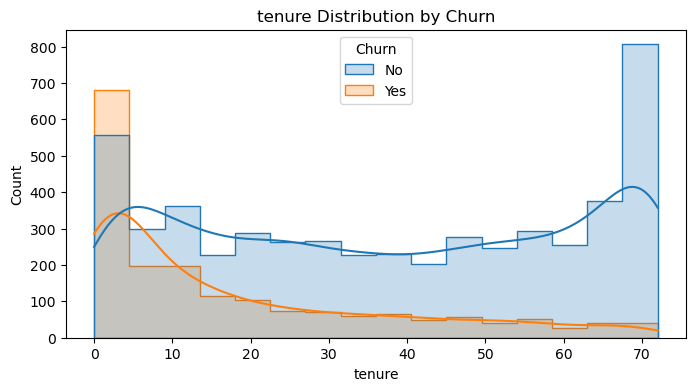

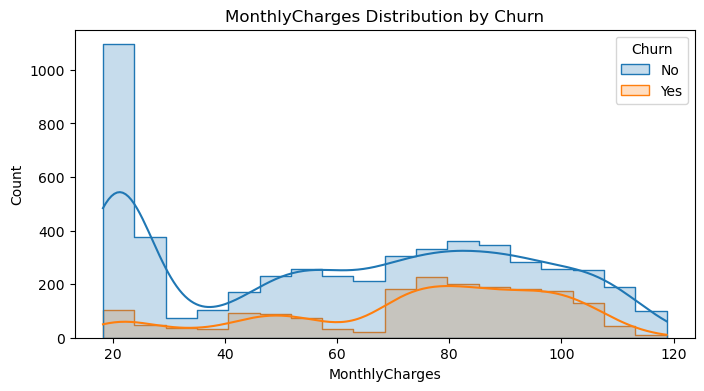

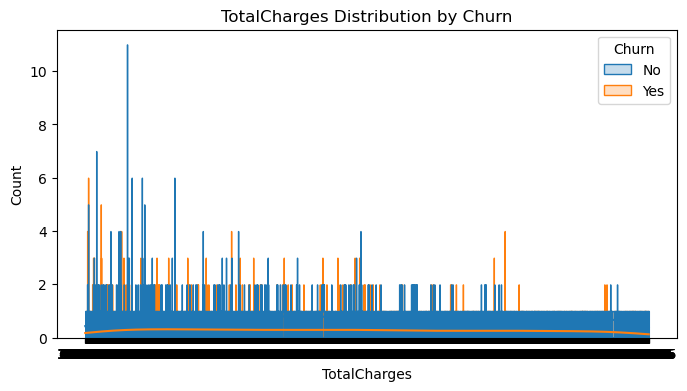

In [50]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, element="step")
    plt.title(f'{col} Distribution by Churn')
    plt.show()

In [72]:
plt.figure(figsize=(10, 8))
corr = df[numerical_features + ['Churn']].copy()
corr['Churn'] = corr['Churn'].map({'Yes': 1, 'No': 0})  # encode Churn
sns.heatmap(corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: ' '

<Figure size 1000x800 with 0 Axes>

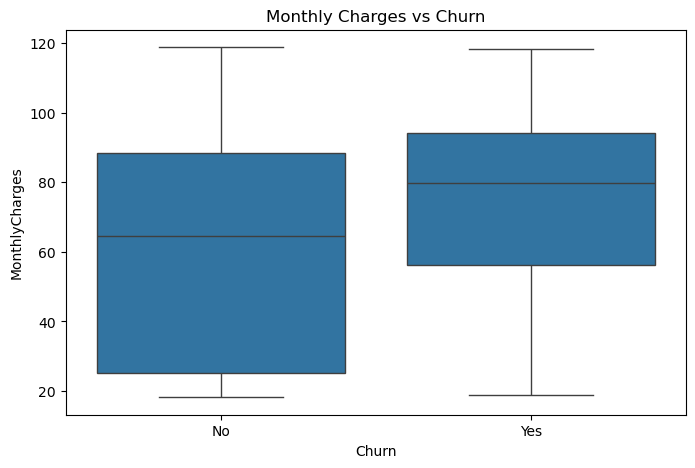

In [73]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

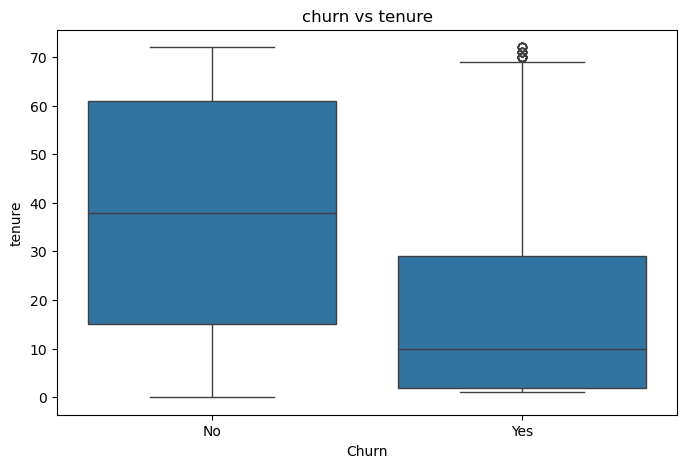

In [75]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('churn vs tenure')
plt.show()

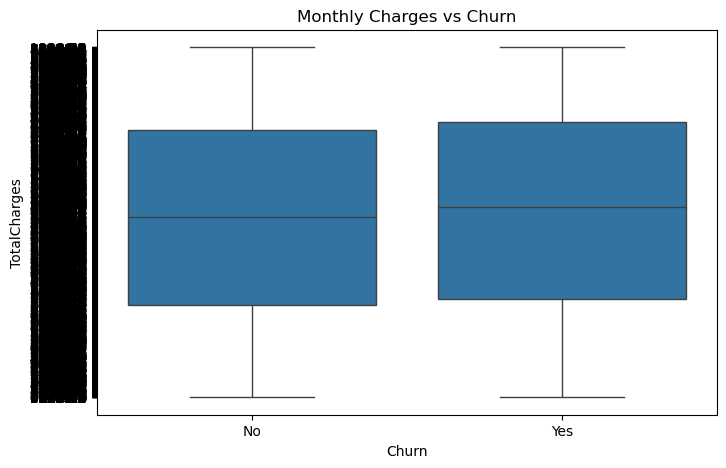

In [77]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

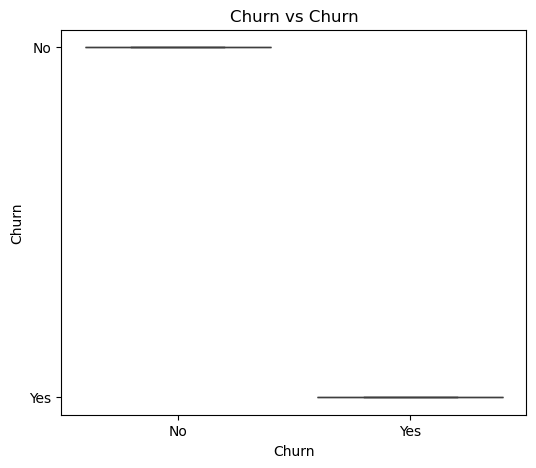

In [93]:
plt.figure(figsize=(6, 5))
sns.boxplot(x='Churn', y='Churn', data=df)
plt.title('Churn vs Churn')
plt.show()

In [94]:
# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    if col != 'Churn':
        df[col] = le.fit_transform(df[col])


In [95]:
# Encode target column
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


In [96]:
# Features and label
X = df.drop('Churn', axis=1)
y = df['Churn']


In [97]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [98]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [103]:
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [106]:
# Make predictions
y_pred = model.predict(X_test)

In [107]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [108]:
# Print scores
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}\n")

Accuracy:  0.7928
Precision: 0.6473
Recall:    0.4772
F1 Score:  0.5494

